### PART1. 데이터셋 준비



> 데이터셋

- heroes_information.csv
- heroes_abilities.csv

✅ 다운로드 후 Google Drive -> 내 드라이브로 옮기기


In [ ]:
# 구글 드라이브 호출
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd

In [ ]:
# 데이터셋 불러오기(type: csv -> df)
info = pd.read_csv('/content/drive/MyDrive/heroes_information.csv')
abilities = pd.read_csv('/content/drive/MyDrive/heroes_abilities.csv')

# 데이터셋 확인하기
print("------------- heros_information.csv 확인하기 ----------")
print(info.head(3))

print("\n ---------- heros_powers.csv 확인하기 ---------------")
print(abilities.head(3))

In [ ]:
print(info.info())    # 캐릭터 기본 정보

In [ ]:
print(abilities.info())   # 캐릭터 보유 능력

### PART2. 데이터셋 병합

In [ ]:
# 두 데이터프레임 병합
merged_data = pd.merge(info, abilities)
print(merged_data.head())    # 병합된 데이터프레임 확인하기

In [ ]:
print(merged_data.info())     # 캐릭터 기본 정보 & 보유 능력

In [9]:
import numpy as np

In [ ]:
# 결측치 처리하기
merged_data.replace(-99, np.nan, inplace=True)

# 결측치 확인하기
print(merged_data.isnull().sum())

In [ ]:
# NaN이 있는 행(axis=0) 제거하기
final_data = merged_data.dropna(axis=0, how='any')

# NaN이 제거된 최종데이터 확인하기
print(final_data.head())

In [ ]:
print(final_data.info())  # 최종데이터

### PART3. ipywidgets

* Ipywidgets의 대표 유형(chatgpt 대답) : 버튼, 슬라이더, 드롭다운, 체크박스, 텍스트, 라디오버튼, 파일업로드, 그래프&차트

### 위젯1. 드롭다운(Dropdown)

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
# 빈 리스트 생성
abilities_list = []

for i in range(10, len(final_data.columns)):
  abilities_list.append(final_data.columns[i])

# abilities_list 확인
print(abilities_list)

In [62]:
# 드롭다운 위젯 생성
ability_dropdown = widgets.Dropdown(options=abilities_list, descriptions='ability', disabled=False)

# 드롬다운 위젯 출력
display(ability_dropdown)

# 함수 정의
def filter_heroes(ability):
  filtered_heroes = final_data[final_data[ability] == True]   # 데이터프레임 조건 필터링
  clear_output(wait=True)             # 이전 출력이 있다면? clear하고 새로운 출력 준비
  display(ability_dropdown)
  print(filtered_heroes['name'])      # 선택된 초능력을 가진 캐릭터 이름 출력

# 함수 적용
ability_dropdown.observe(lambda change: filter_heroes(change.new), names='value')   # 선택된 값(new 속성)

Dropdown(index=12, options=('Underwater breathing', 'Teleportation', 'Telekinesis', 'Energy Beams', 'Fire Cont…

169        Crystal
497    Red Tornado
593        Tempest
Name: name, dtype: object


#### [ 미완성 ] 드롭다운 위젯

In [ ]:
# 드롭다운 위젯 생성
ability_dropdown = widgets.Dropdown(options=abilities_list, descriptions='ability', disabled=False)

# 드롬다운 위젯 출력
display(ability_dropdown)

### 위젯2. 검색 위젯 (텍스트 + 버튼)

In [43]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [61]:
# 텍스트 위젯 생성
search_box = widgets.Text(placeholder='Enter character name', description='Search:')

# 버튼 위젯 생성
search_button = widgets.Button(description="Search")

# 두 위젯 출력
display(search_box, search_button)

# 합수 정의
def on_button_click(event):
    search_term = search_box.value
    if not len(search_term) == 0:
        filter_by_name(search_term)      # 검색어 -> filter_by_name() 함수 호출
    else:
      print("No name entered. Please try again.")

def filter_by_name(search_term):
    filtered_data = final_data[final_data['name'].str.contains(search_term, case=False)]  # 대소문자 구분 없이 검색어가 포함된 데이터
    clear_output(wait=True)
    display(search_box, search_button)
    display(filtered_data.iloc[:, :10])  # 검색 결과 출력

# 함수 적용
# 버튼 클릭 -> on_button_click() 함수 호출
search_button.on_click(on_button_click)

Text(value='black', description='Search:', placeholder='Enter character name')

Button(description='Search', style=ButtonStyle())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
88,Black Adam,Male,brown,-,Black,191.0,DC Comics,-,bad,113.0
89,Black Bolt,Male,blue,Inhuman,Black,188.0,Marvel Comics,-,good,95.0
90,Black Canary,Female,blue,Human,Blond,165.0,DC Comics,-,good,58.0
91,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,-,good,59.0
92,Black Cat,Female,green,Human,Blond,178.0,Marvel Comics,-,good,54.0
94,Black Knight III,Male,brown,Human,Brown,183.0,Marvel Comics,-,good,86.0
95,Black Lightning,Male,brown,-,No Hair,185.0,DC Comics,-,good,90.0
96,Black Mamba,Female,green,-,Black,170.0,Marvel Comics,-,bad,52.0
97,Black Manta,Male,black,Human,No Hair,188.0,DC Comics,-,bad,92.0
98,Black Panther,Male,brown,Human,Black,183.0,Marvel Comics,-,good,90.0


#### [ 미완성 ] 검색 위젯

In [ ]:
# 텍스트 위젯 생성
search_box = widgets.Text(placeholder='Enter character name', description='Search:')

# 버튼 위젯 생성
search_button = widgets.Button(description="Search")

# 두 위젯 출력
display(search_box, search_button)

### [ 추가 ] 시각화 - matplotlib

In [39]:
import matplotlib.pyplot as plt

Underwater breathing    18
Teleportation           48
Telekinesis             41
Energy Beams            32
Fire Control            23
Precognition            14
Hypnokinesis            18
Animal Control           6
Levitation              24
Water Control           10
Omnilingualism          12
Magnetism                9
Wind Control             3
Resurrection            12
Weather Control          5
Web Creation            14
dtype: int64


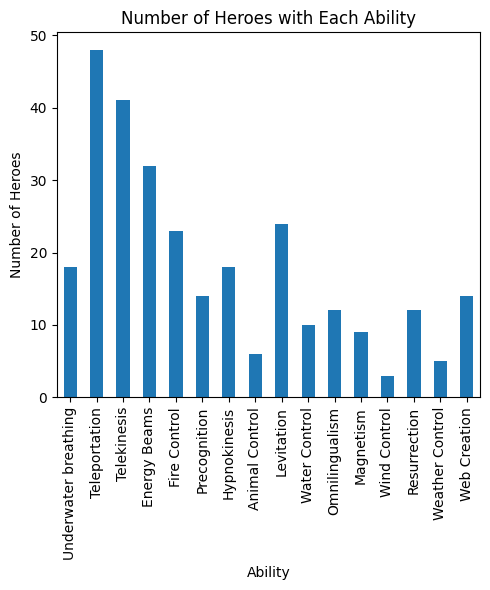

In [41]:
ability_counts = final_data.iloc[:, 10:].sum()  # 숫자 기반 슬라이싱
               # final_data.loc[:, final_data.columns[10:]].sum()과 같음 (레이블 기반 슬라이싱)

plt.figure(figsize=(5, 6))
print(ability_counts)

ability_counts.plot(kind='bar') # 막대그래프

plt.title('Number of Heroes with Each Ability')
plt.xlabel('Ability')
plt.ylabel('Number of Heroes')
plt.tight_layout()
plt.show()